In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

In [5]:
# Outer: Fish Stocking
# Inner: Plants
weight = {
    5: {
        0: 0,
        1: 173.2,
        5: 866.0,
        10: 1.732e3,
        20: 3.463e3,
        30: 5.162e3,
        40: 6.360e3,
        50: 7.181e3,
        60: 7.895e3,
        70: 8.397e3,
        80: 8.647e3,
        90: 8.840e3,
        100: 9.001e3,
        150: 9.514e3,
        200: 9.807e3
    },
    10: {
        0: 0,
        1: 173.2,
        5: 866.0,
        10: 1.732e3,
        20: 3.464e3,
        30: 5.196e3,
        40: 6.927e3,
        50: 8.654e3,
        60: 1.035e4,
        70: 1.174e4,
        80: 1.285e4,
        90: 1.382e4,
        100: 1.461e4,
        150: 1.681e4,
        200: 1.771e4
    },
    12: {
        0: 0,
        1: 173.2,
        5: 866.0,
        10: 1.732e3,
        20: 3.464e3,
        30: 5.196e3,
        40: 6.928e3,
        50: 8.658e3,
        60: 1.038e4,
        70: 1.203e4,
        80: 1.337e4,
        90: 1.447e4,
        100: 1.547e4,
        150: 1.845e4,
        200: 1.969e4
    },
    20: {
        0: 0,
        1: 173.2,
        5: 866.0,
        10: 1.732e3,
        20: 3.464e3,
        30: 5.196e3,
        40: 6.928e3, 
        50: 8.659e3,
        60: 1.039e4,
        70: 1.212e4,
        80: 1.383e4,
        90: 1.546e4,
        100: 1.681e4,
        150: 2.149e4,
        200: 2.377e4
    }
}
mortality = {
    5: {
        0: 0,
        1: 0,
        5: 0,
        10: 0,
        20: 0,
        30: 0,
        40: 0,
        50: 0,
        60: 0,
        70: 0,
        80: 0,
        90: 0,
        100: 0,
        150: 0,
        200: 0
    },
    10: {
        0: 6,
        1: 5,
        5: 0,
        10: 0,
        20: 0,
        30: 0,
        40: 0,
        50: 0,
        60: 0,
        70: 0,
        80: 0,
        90: 0,
        100: 0,
        150: 0,
        200: 0
    },
    12: {
        0: 8,
        1: 7,
        5: 3,
        10: 1,
        20: 1,
        30: 1,
        40: 1, 
        50: 1,
        60: 1,
        70: 1,
        80: 1,
        90: 1,
        100: 1,
        150: 1,
        200: 1
    },
    20: {
        0: 17,
        1: 16,
        5: 12,
        10: 9,
        20: 7,
        30: 6,
        40: 5,
        50: 5,
        60: 5,
        70: 5,
        80: 5,
        90: 5,
        100: 5,
        150: 5,
        200: 5
    }
}
biomass = {
    5: {
        0: 578.3,
        1: 2.519e3,
        5: 5.155e3,
        10: 5.369e3,
        20: 5.498e3,
        30: 5.546e3,
        40: 5.571e3,
        50: 5.586e3,
        60: 5.597e3,
        70: 5.605e3,
        80: 5.611e3,
        90: 5.616e3,
        100: 5.620e3,
        150: 5.635e3,
        200: 5.645e3
    },
    10: {
        0: 620.1,
        1: 2.317e3,
        5: 6.369e3,
        10: 8.859e3,
        20: 1.068e4,
        30: 1.080e4,
        40: 1.084e4,
        50: 1.082e4,
        60: 1.088e4,
        70: 1.089e4,
        80: 1.084e4,
        90: 1.090e4,
        100: 1.091e4,
        150: 1.087e4,
        200: 1.094e4
    },
    12: {
        0: 616.7,
        1: 2.234e3,
        5: 6.250e3,
        10: 8.937e3,
        20: 1.165e4,
        30: 1.202e4,
        40: 1.219e4,
        50: 1.228e4,
        60: 1.234e4,
        70: 1.238e4,
        80: 1.240e4,
        90: 1.242e4,
        100: 1.244e4,
        150: 1.248e4,
        200: 1.249e4
    },
    20: {
        0: 657.7,
        1: 2.391e3,
        5: 5.776e3,
        10: 8.688e3,
        20: 1.239e4,
        30: 1.398e4,
        40: 1.475e4,
        50: 1.497e4,
        60: 1.515e4,
        70: 1.526e4,
        80: 1.533e4,
        90: 1.540e4,
        100: 1.544e4,
        150: 1.556e4,
        200: 1.561e4
    }
    
}
dfweight = pd.DataFrame(weight)
dfmortality = pd.DataFrame(mortality)
dfbiomass = pd.DataFrame(biomass)

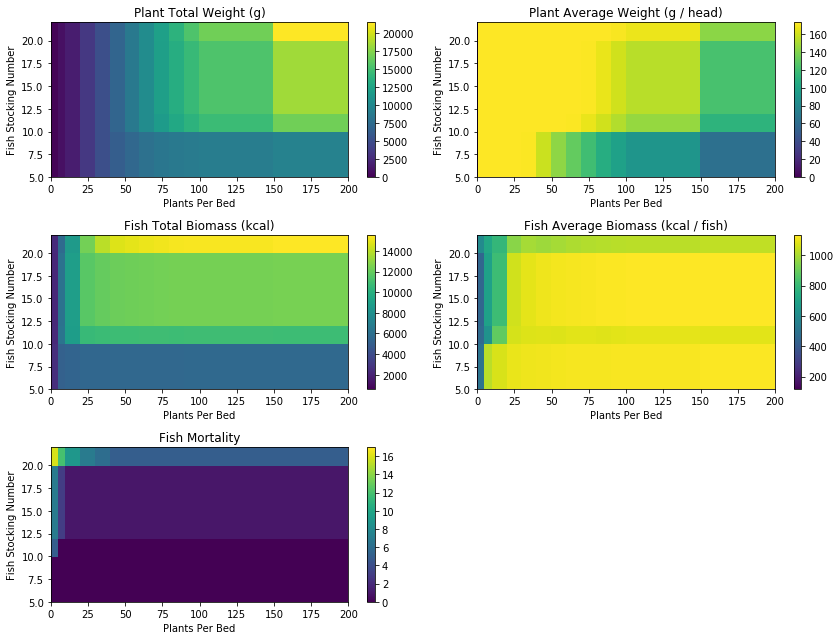

In [6]:
avbiomass = dfbiomass.copy()
for col in avbiomass.columns:
    avbiomass[col] /= (col - dfmortality[col])
    
avweight = dfweight.copy()
for col in avweight.columns:
    avweight[col] /= avweight.axes[0]
avweight = avweight.fillna(0)
avbiomass = avbiomass.fillna(0)

dfs = [avbiomass, dfbiomass, avweight, dfweight, dfmortality]
for df in dfs:
    # Dummy column
    mx = max(df.columns)
    df[mx + 5] = df[mx]

def plot_df_surf(dft):
    df = dft.T
    
    X, Y = np.meshgrid(df.columns, df.axes[0])
    Z = df.values
    
    plt.pcolor(X, Y, Z)
    plt.ylabel('Fish Stocking Number')
    plt.xlabel('Plants Per Bed')
    plt.ylim(5, 22)
    
    plt.colorbar()

#print(avweight)

plt.figure(figsize=(12, 9))

plt.subplot(321)
plot_df_surf(dfweight)
plt.title('Plant Total Weight (g)')

plt.subplot(322)
plot_df_surf(avweight)
plt.title('Plant Average Weight (g / head)')

plt.subplot(323)
plot_df_surf(dfbiomass)
plt.title('Fish Total Biomass (kcal)')

plt.subplot(324)
plot_df_surf(avbiomass)
plt.title('Fish Average Biomass (kcal / fish)')

plt.subplot(325)
plot_df_surf(dfmortality)
plt.title('Fish Mortality')

plt.tight_layout()